# Feature Scaling 👨🏻‍💻
(Data Normalization & Standardization) 
---
### Agenda

1. [Hypothesis Generation](#Hypothesis)
2. [Data Exploration](#Exploration)
3. [Data Cleaning](#Cleaning)
4. [Feature Engineering](#Engineering)
5. [Data Visualization](#Visualization)
6. [Feature Scaling](#Scaling)
    - Normalization using Sklearn
    - Standardization using Sklearn

---

### We will explore the problem in following stages:

- **Hypothesis Generation** – understanding the problem better by brainstorming possible factors that can impact the outcome.
- **Data Exploration** – looking at categorical and continuous feature summaries and making inferences about the data.
- **Data Cleaning** – imputing missing values in the data and checking for outliers.
- **Feature Engineering** – modifying existing variables and creating new ones for analysis.
- **Feature Scaling** - normalization and standardization of independent features present in the data in a fixed range


## <a id='Hypothesis'></a>1. Hypothesis Generation

### The Problem Statement
Understanding the problem statement is the first and foremost step. The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

### The Hypotheses
We came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come-up with many more of these.

#### Store Level Hypotheses:

1- City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.  
2- Population Density: Stores located in densely populated areas should have higher sales because of more demand.  
3- Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.  
4- Competitors: Stores having similar establishments nearby should have less sales because of more competition.  
5- Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.  
6- Location: Stores located within popular marketplaces should have higher sales because of better access to customers.  
7- Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.  
8- Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.  

#### Product Level Hypotheses:

1- Brand: Branded products should have higher sales because of higher trust in the customer.  
2- Packaging: Products with good packaging can attract customers and sell more.  
3- Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.  
4- Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.  
5- Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.  
6- Advertising: Better advertising of products in the store will should higher sales in most cases.  
7- Promotional Offers: Products accompanied with attractive offers and discounts will sell more.  

**These are just some basic 15 hypothesis we have made, but you can think further and create some of your own.**

Lets move on to the data exploration where we will have a look at the data in detail.


## <a id='Exploration'></a>2. Data Exploration📋

The first step is to look at the data and try to identify the information which we hypothesized vs the available data. A comparison between the data dictionary on the competition page and out hypotheses is shown below:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/0.-data-dictionary-1.png" width="800">

We can summarize the findings as:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/venn.png" width="400">



### Libraries 📕📗📘

In [35]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [36]:
import pandas as pd
import numpy as np

#Read files:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

"""Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide 
them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into 
a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs."""

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [3]:
from pandas_profiling import ProfileReport
ProfileReport(data)

ModuleNotFoundError: No module named 'pandas_profiling'

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
#  Lets start by checking which columns contain missing values.
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [6]:
# Lets look at some basic statistics for numerical variables
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data["Item_Outlet_Sales"].plot(kind="bar")

<AxesSubplot: >

Error in callback <function flush_figures at 0x7f88a465c700> (for post_execute):


KeyboardInterrupt: 

Item_Type
Baking Goods             AxesSubplot(0.125,0.125;0.775x0.755)
Breads                   AxesSubplot(0.125,0.125;0.775x0.755)
Breakfast                AxesSubplot(0.125,0.125;0.775x0.755)
Canned                   AxesSubplot(0.125,0.125;0.775x0.755)
Dairy                    AxesSubplot(0.125,0.125;0.775x0.755)
Frozen Foods             AxesSubplot(0.125,0.125;0.775x0.755)
Fruits and Vegetables    AxesSubplot(0.125,0.125;0.775x0.755)
Hard Drinks              AxesSubplot(0.125,0.125;0.775x0.755)
Health and Hygiene       AxesSubplot(0.125,0.125;0.775x0.755)
Household                AxesSubplot(0.125,0.125;0.775x0.755)
Meat                     AxesSubplot(0.125,0.125;0.775x0.755)
Others                   AxesSubplot(0.125,0.125;0.775x0.755)
Seafood                  AxesSubplot(0.125,0.125;0.775x0.755)
Snack Foods              AxesSubplot(0.125,0.125;0.775x0.755)
Soft Drinks              AxesSubplot(0.125,0.125;0.775x0.755)
Starchy Foods            AxesSubplot(0.125,0.125;0.775x0.755

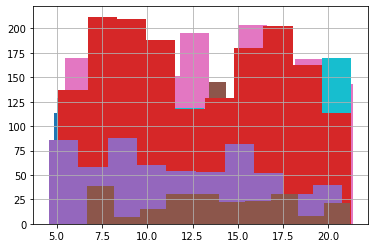

In [13]:

data.groupby("Item_Type")["Item_Weight"].hist()


In [23]:
item_type = data["Item_Type"]


In [24]:
unique_values = item_type.unique()


In [31]:
item_type_counts = item_type.value_counts()


In [32]:
sorted_item_types = item_type_counts.index.sort_values(ascending=False)


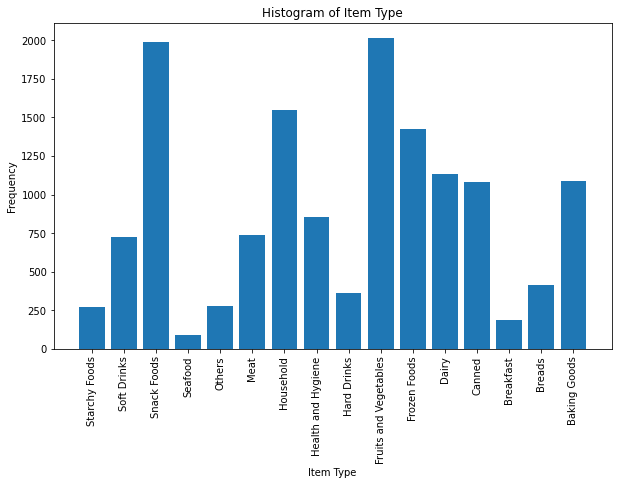

In [33]:
plt.figure(figsize=(10, 6))
plt.xlabel("Item Type")
plt.ylabel("Frequency")
plt.title("Histogram of Item Type")
plt.bar(sorted_item_types, item_type_counts[sorted_item_types])
plt.xticks(rotation=90)
plt.show()

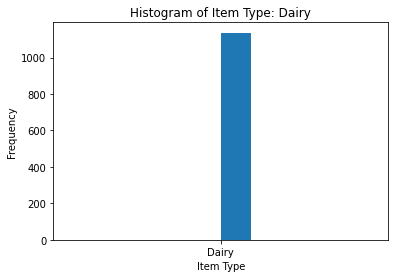

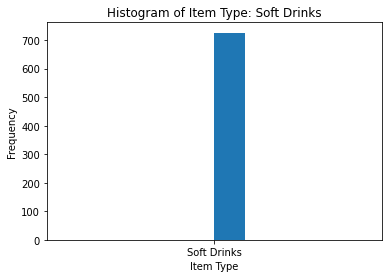

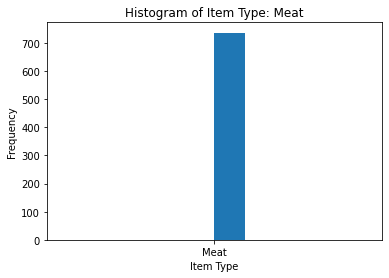

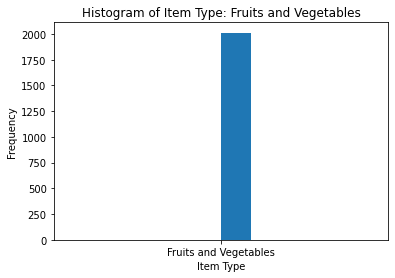

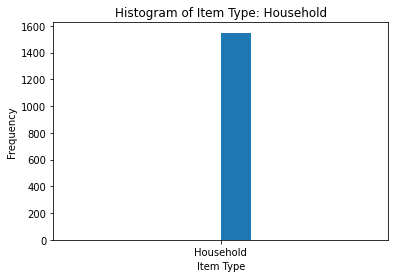

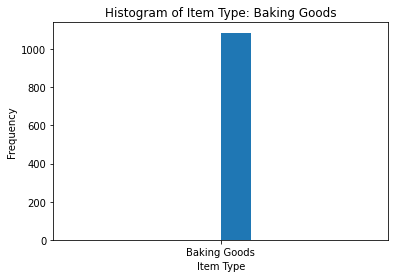

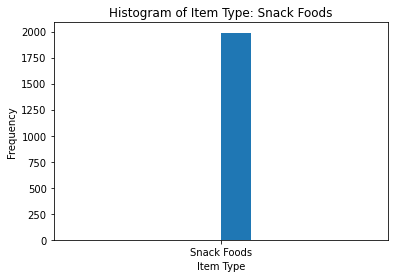

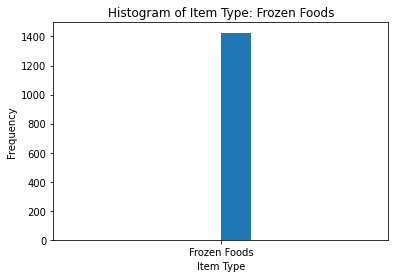

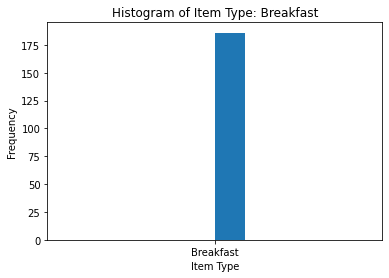

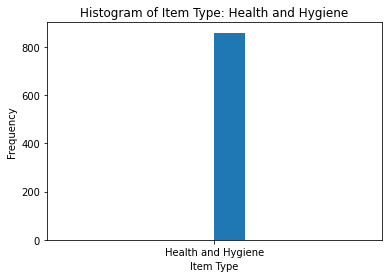

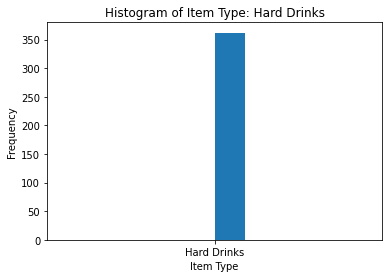

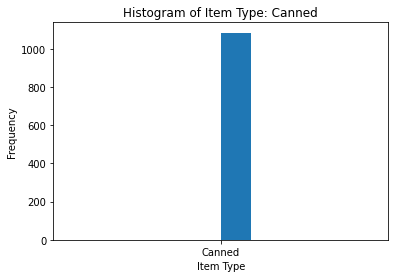

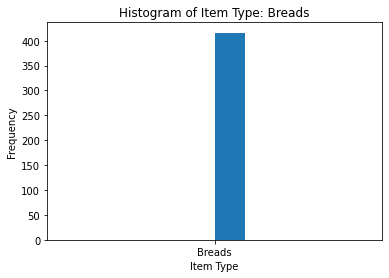

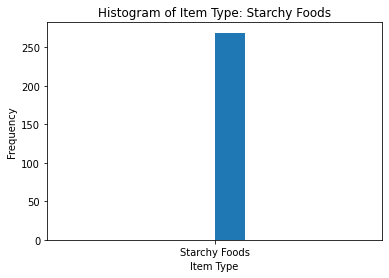

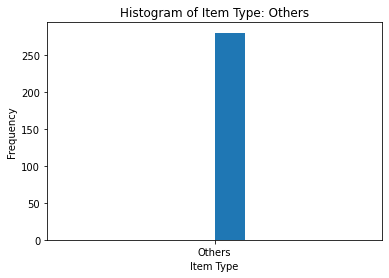

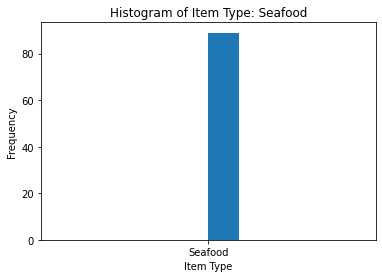

In [25]:
for value in unique_values:
    subset = data[data["Item_Type"] == value]
    plt.hist(subset["Item_Type"], bins=10)  # Adjust the number of bins as per your preference
    plt.xlabel("Item Type")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Item Type: {value}")
    plt.show()

In [14]:
item_identifier = data["Item_Identifier"]


In [20]:
unique_values = item_identifier.unique()


---
**Some observations:**

- Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

- Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

- The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.
---

In [5]:
# Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [6]:
# Let’s explore further using the frequency of different categories in each nominal variable. 
# we’ll exclude the ID and source variables for obvious reasons.
#========================================================================

#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())
    print('===================================================')


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [ ]:
data.replace({""})

**The output gives us following observations:**

- Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

- Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.

- Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.


## <a id='Cleaning'></a>3. Data Cleaning

**Imputing Missing Values**  
We found two variables with missing values **Item_Weight and Outlet_Size**. Lets impute the former by the average weight of the particular item. This can be done as:

In [15]:
data.Item_Weight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
11765 non-null  float64
dtypes: float64(1)
memory usage: 111.1 KB


In [9]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [10]:
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


**This confirms that the column has no missing values now.**


## <a id='Engineering'></a>4. Feature Engineering

Lets move on to resolving them and making our data ready for analysis. <span style="color:blue">We will also create some new variables using the existing ones in this section.</span>

1- Consider combining Outlet_Type  
2- Modify Item_Visibility  
3- Create a broad category of Type of Item  
4- Determine the years of operation of a store  
5- Modify categories of Item_Fat_Content  
6- Numerical and One-Hot Coding of Categorical variables  
7- Exporting Data  

In [8]:
# step 1: Consider combining Outlet_Type
#======================================
# This will show significant difference between them and we’ll leave them as it is.
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [9]:
# Step 2: Modify Item_Visibility
#===============================
# We noticed that the minimum value here is 0, which makes no practical sense. 
# Lets consider it like missing information and impute it with mean visibility of that product.


#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


👉 In step 1 we assumed that products with high visibility are likely to sell more. But along with comparing products in absolute terms, we have to look at how much a product is seen in that particular store compared to the average visibility of that product in all stores. This will give an idea of how much importance has been given to this product in the store compared to other stores. We can use the 'visibility_avg' variable mentioned above to achieve this.

In [10]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [11]:
# Step 3: Create a broad category of Type of Item
#===============================================
# We saw earlier that the Item_Type variable has 16 classes which can be very useful for parsing. 
# So it is a good idea to combine them.

#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

<span style="color:blue">Another idea could be to combine categories based on sales. The ones with high average sales could be combined together. **I leave this for you to try**.</span>


In [12]:
# Step 4: Determine the years of operation of a store
#====================================================

#We wanted to make a new column depicting the years of operation of a store. This can be done as:

#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

# This will show stores which are 4-28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [13]:
# Step 5: Modify categories of Item_Fat_Content
#==============================================
# We found typos and a difference in representation in the Item_Fat_Content variable classes. This can be corrected as follows:

#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


**Now it makes more sense. But wait, in step 4 we saw that there are some non-consumables as well and they shouldn't have fat content specified. So we can also create a separate class for such kind of notes.**

In [14]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [15]:
#creating our new column for both datasets
data['Outlet_Age']= data['Outlet_Establishment_Year'].apply(lambda year: 2021 - year)

##uncomment to check result
data['Outlet_Age'].head

<bound method NDFrame.head of 0        22
1        12
2        22
3        23
4        34
         ..
14199    24
14200    12
14201    19
14202    14
14203    19
Name: Outlet_Age, Length: 14204, dtype: int64>

## <a id='Visualization'></a>5. Data Visualization 📊

## Univariate Plots
For starters we will create countplots for the categorical columns:

<span style="color:blue">**Categoric columns realizations**</span>

**Item_Fat_Content** - Most items sold are low fat.    
**Item_Type** - Item types that are distictly popular are fruits and vegetables and snack foods.  
**Outlet_Identifier** - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.   
**Outlet_Size** - Bigmart outlets are mostly medium sized in our data.  
**Outlet_Location_Type** - The most common type is Tier3.  
**Outlet_Type** - By a wide margin the mode outlet type is Supermarket Type1.  



<span style="color:blue">**Numeric columns realizations**</span>

**Outlet_Age** - The most common outlets are 35 years old.  
**Item_Weight** - The data is very spreaded, no specific pattern.  
**Item_Visibility** - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.  
**Item_MRP** - Items with higher MRP tend to sell better in most cases.  

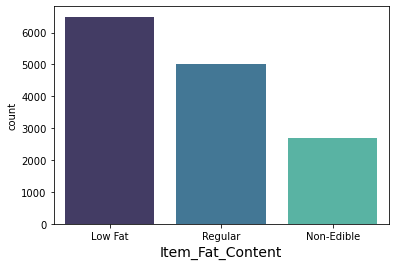

In [16]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=data ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

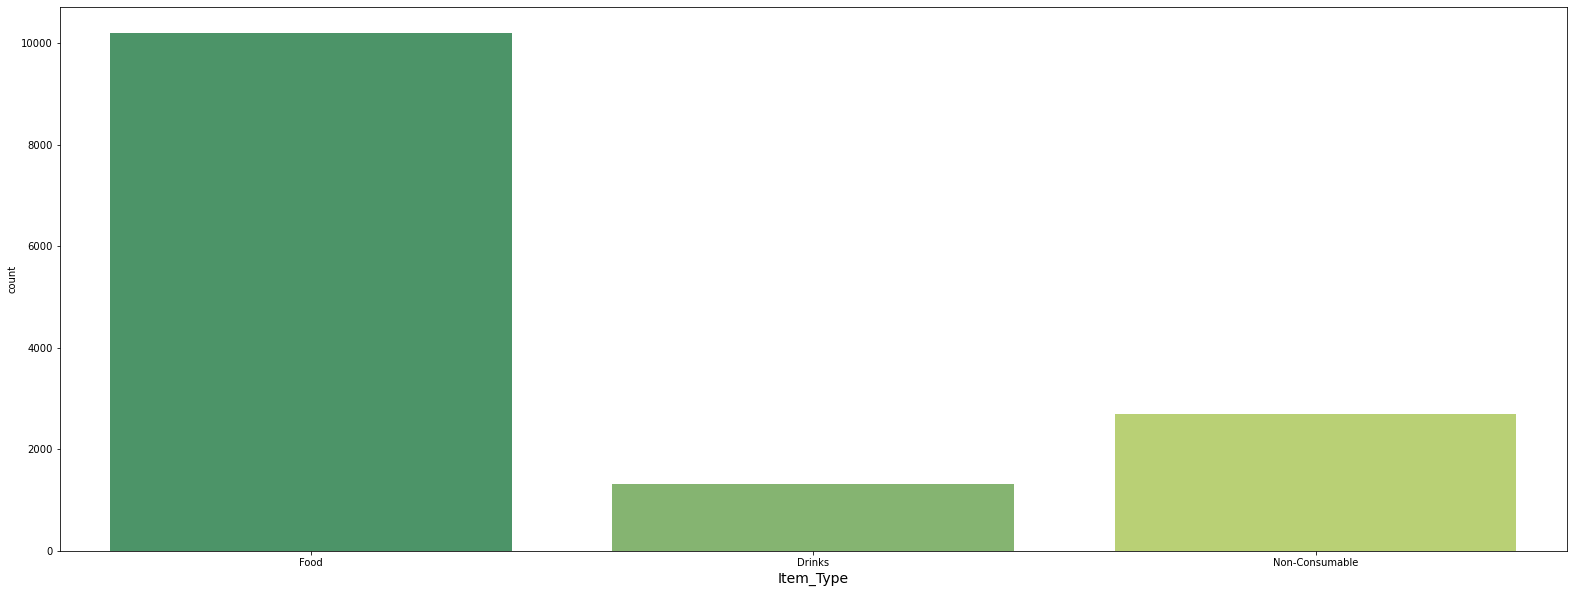

In [17]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type_Combined' , data=data ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

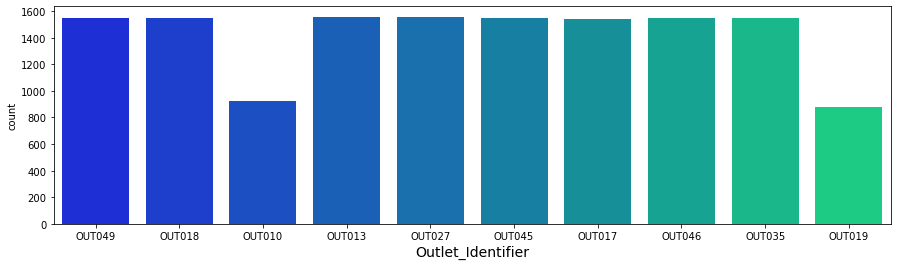

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=data ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

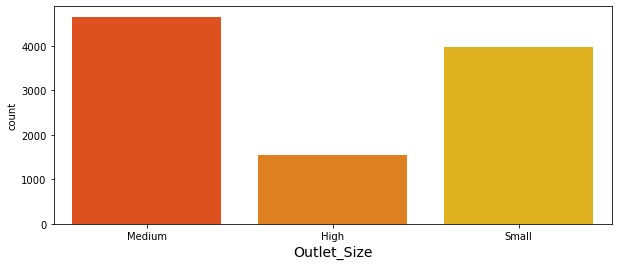

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=data ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

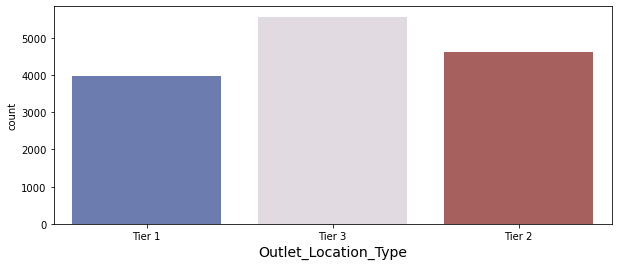

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=data ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

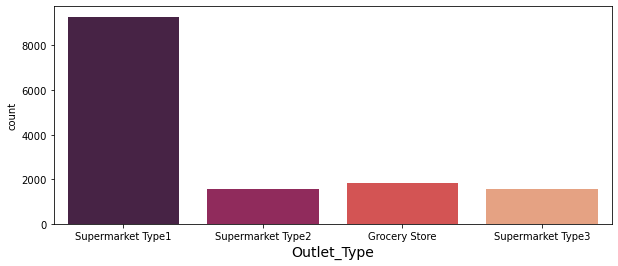

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=data ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

<span style="color:red">**Now for the numerical columns**</span>

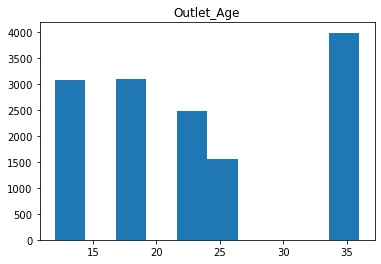

In [22]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  data[num]

plt.hist(data['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

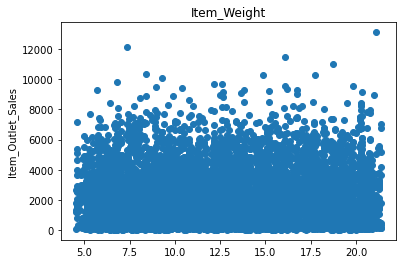

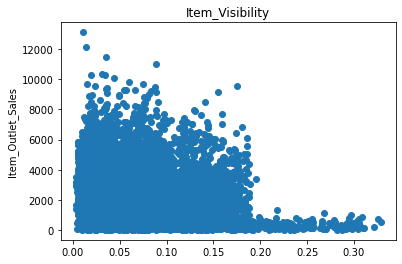

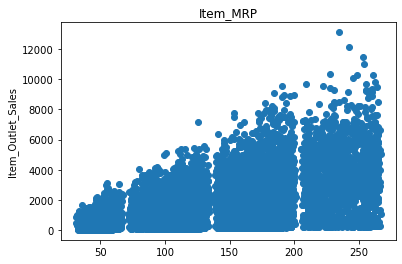

In [23]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

## Multivariate Plots
I want to check the following relationships with `Item_Outlet_Sales`:

- Sales per item type
- Sales per outlet
- Sales per outlet type
- Sales per outlet size
- Sales per location type

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


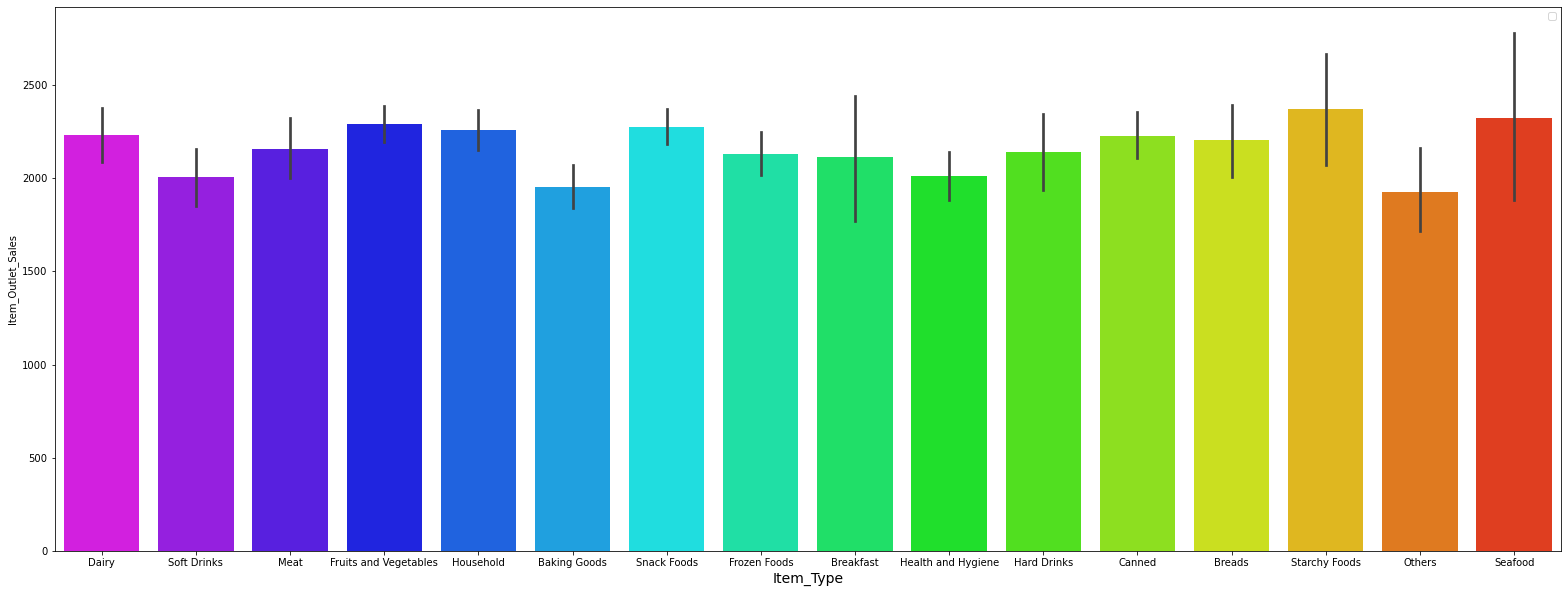

In [24]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=data ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


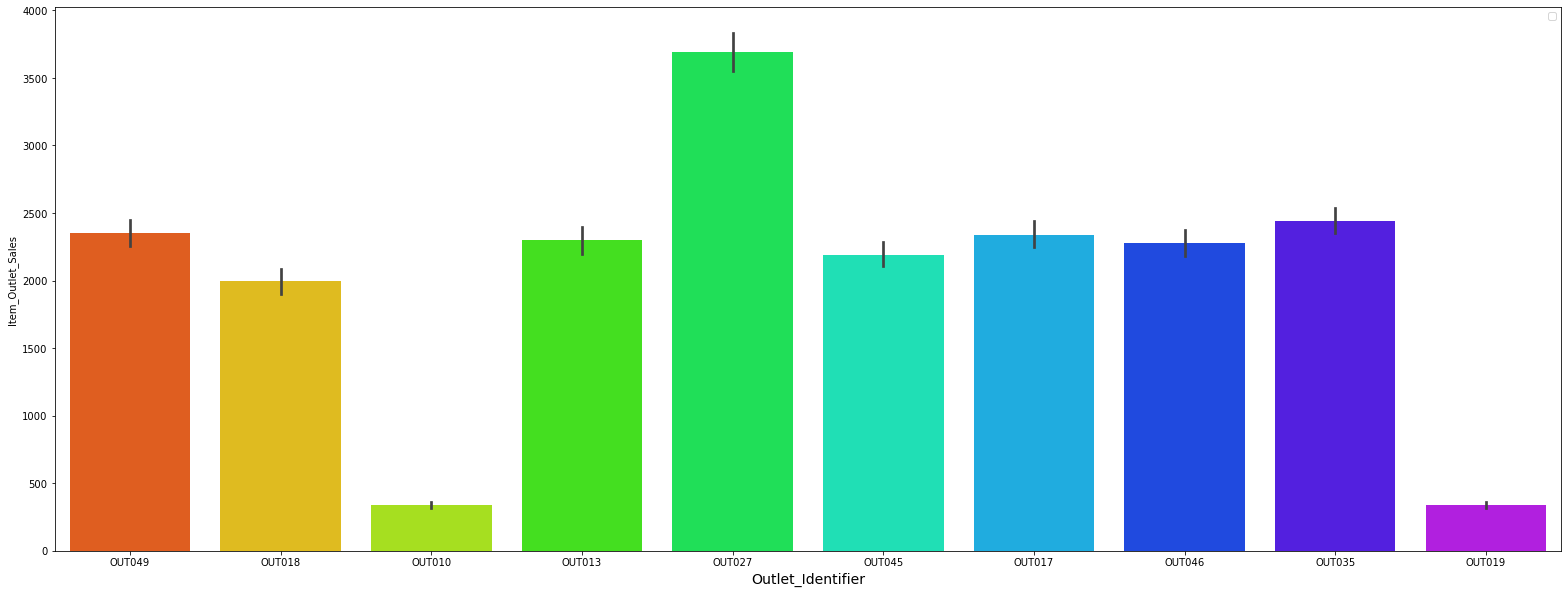

In [25]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=data ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


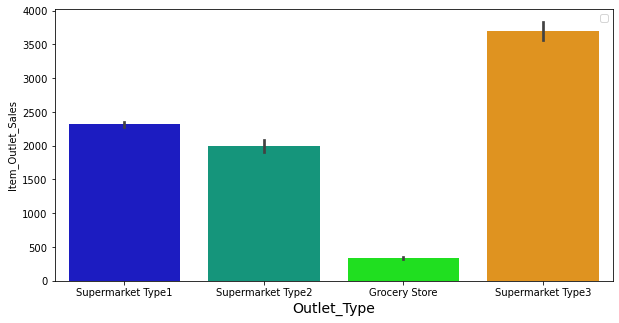

In [26]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=data ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


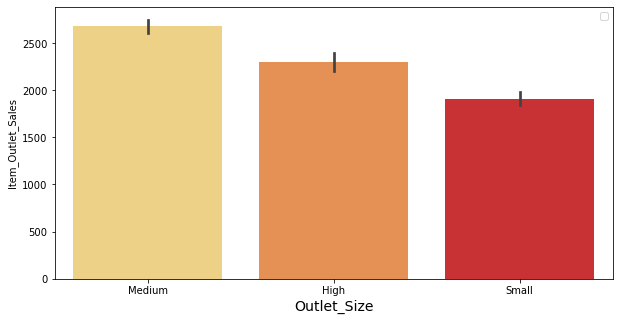

In [27]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=data ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asset\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


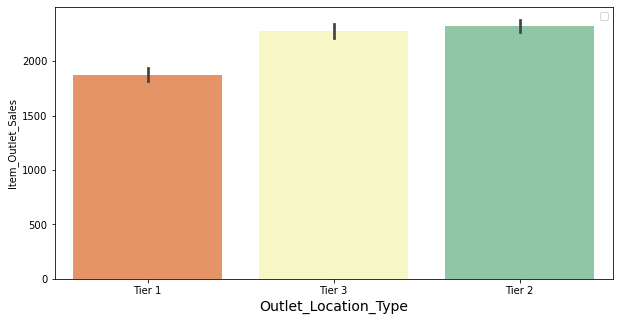

In [28]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=data ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

<span style="color:red">**Realizations:**</span>

- The difference in item types by sales is very small.  
- Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.  
- Suprisingly supermarket type 3 is the most profitable and not type 1.  
- Medium and high outlet sizes are pretty much even in sales.  
- Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).  

## Corraltion Matrix
We can see `Item_Outlet_Sales` is highly correlated with `Item_MRP`


<AxesSubplot:>

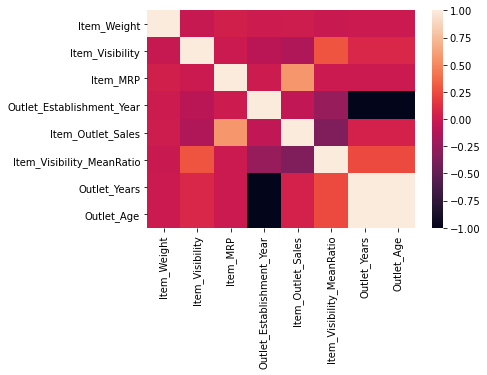

In [29]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='rocket')

In [31]:
# Step 6: Numerical and One-Hot Coding of Categorical variables
#=============================================================
# Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

# Lets look at the datatypes of columns now:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined             int64
Outlet_Years                   int64
Outlet_Age                     int64
dtype: object

In [33]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet_Age
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,train,0.931078,1,14,22
1,5.92,2,0.019278,48.2692,3,1,2,2,443.4228,train,0.933420,0,4,12
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,train,0.960069,1,14,22
3,19.20,2,0.017834,182.0950,0,3,2,0,732.3800,train,1.000000,1,15,23
4,8.93,1,0.009780,53.8614,1,0,2,1,994.7052,train,1.000000,2,26,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,2,0.013496,141.3154,8,2,0,1,NaN,test,0.874729,1,16,24
14200,7.60,2,0.142991,169.1448,3,1,2,2,NaN,test,0.878292,1,4,12
14201,10.00,1,0.073529,118.7440,7,3,1,1,NaN,test,1.162245,2,11,19
14202,15.30,2,0.088380,214.6218,2,3,1,1,NaN,test,1.000000,1,6,14


## <a id='Scaling'></a>6. Feature Scaling

In [34]:
# spliting training and testing data
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [36]:
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Asset\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet_Age
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,0.931078,1,14,22
1,5.920,2,0.019278,48.2692,3,1,2,2,443.4228,0.933420,0,4,12
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,0.960069,1,14,22
3,19.200,2,0.017834,182.0950,0,3,2,0,732.3800,1.000000,1,15,23
4,8.930,1,0.009780,53.8614,1,0,2,1,994.7052,1.000000,2,26,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,0.874001,1,26,34
8519,8.380,2,0.046982,108.1570,7,3,1,1,549.2850,1.001096,1,11,19
8520,10.600,1,0.035186,85.1224,6,2,1,1,1193.1136,0.998881,2,9,17
8521,7.210,2,0.145221,103.1332,3,1,2,2,1845.5976,1.041620,1,4,12


## Normalization using sklearn
To normalize your data, you need to import the `MinMaxScalar` from the `sklearn` library and apply it to our dataset. So, let’s do that!

In [37]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(train)

# transform training data
train_norm = norm.transform(train)

# transform testing dataabs
test_norm = norm.transform(test)

In [46]:
# Let’s see how normalization has affected our dataset:
pd.DataFrame(train_norm,columns=train.columns)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet_Age
0,0.282525,0.0,0.038399,0.927507,1.000000,0.333333,0.0,0.333333,0.283587,0.037359,0.5,0.416667,0.416667
1,0.081274,1.0,0.048346,0.072068,0.333333,0.333333,1.0,0.666667,0.031419,0.038443,0.0,0.000000,0.000000
2,0.770765,0.0,0.040593,0.468288,1.000000,0.333333,0.0,0.333333,0.158115,0.050783,0.5,0.416667,0.416667
3,0.871986,1.0,0.043901,0.640093,0.000000,1.000000,1.0,0.000000,0.053555,0.069272,0.5,0.458333,0.458333
4,0.260494,0.5,0.019104,0.095805,0.111111,0.000000,1.0,0.333333,0.073651,0.069272,1.0,0.916667,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.163812,0.777729,0.111111,0.000000,1.0,0.333333,0.210293,0.010931,0.5,0.916667,0.916667
8519,0.227746,1.0,0.133638,0.326263,0.777778,1.000000,0.5,0.333333,0.039529,0.069779,0.5,0.291667,0.291667
8520,0.359929,0.5,0.097321,0.228492,0.666667,0.666667,0.5,0.333333,0.088850,0.068754,1.0,0.208333,0.208333
8521,0.158083,1.0,0.436080,0.304939,0.333333,0.333333,1.0,0.666667,0.138835,0.088543,0.5,0.000000,0.000000


<span style="color:red">**All the features now have a minimum value of 0 and a maximum value of 1. Perfect!**</span>
## Standardization using sklearn
To standardize your data, you need to import the `StandardScalar` from the `sklearn` library and apply it to our dataset. Here’s how you can do it:

In [39]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
train_stand = train.copy()
test_stand = test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(train_stand[[i]])
    
    # transform the training data column
    train_stand[i] = scale.transform(train_stand[[i]])
    
    # transform the testing data column
    test_stand[i] = scale.transform(test_stand[[i]])

In [47]:
# Let’s see how standardization has affected our dataset:
pd.DataFrame(train_stand,columns=train.columns)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet_Age
0,-0.769246,0,-1.081039,1.747454,9,1,0,1,3735.1380,0.931078,1,14,-0.139541
1,-1.496813,2,-1.016230,-1.489023,3,1,2,2,443.4228,0.933420,0,4,-1.334103
2,0.995858,0,-1.066741,0.010040,9,1,0,1,2097.2700,0.960069,1,14,-0.139541
3,1.361794,2,-1.045193,0.660050,0,3,2,0,732.3800,1.000000,1,15,-0.020085
4,-0.848890,1,-1.206757,-1.399220,1,0,2,1,994.7052,1.000000,2,26,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.293395,0,-0.263919,1.180783,1,0,2,1,2778.3834,0.874001,1,26,1.293934
8519,-0.967282,2,-0.460515,-0.527301,7,3,1,1,549.2850,1.001096,1,11,-0.497909
8520,-0.489412,1,-0.697133,-0.897208,6,2,1,1,1193.1136,0.998881,2,9,-0.736822
8521,-1.219132,2,1.510033,-0.607977,3,1,2,2,1845.5976,1.041620,1,4,-1.334103


In [ ]:
# Step 7: Exporting Data
#=======================
#Export files as modified versions:
train.to_csv("./Data/train_modified.csv",index=False)
test.to_csv("./Data/test_modified.csv",index=False)

# Good Luck 🤗 🤗 🤗